In [1]:
# Remember you need to use SWAN with NXCALS support....
import datetime
import pytimber
import pandas as pd
ldb = pytimber.LoggingDB(source="nxcals")

kinit: type the password for `dgamba`:········


In [2]:
# Just some simple imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['text.usetex'] = False # sometimes best to keep it False for faster plotting...
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = 12

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#plt.rcParams['font.family'] = "Helvetica"

### Interval to look at:

In [3]:
t1, t2 = "2022-09-29 00:00:00.000", "2022-09-30 00:00:00.000"


### Get data from DB
This will be the slow part of the code...

In [4]:
vars_RP = {
    'PAXA604:MIN': 'AEgIS', 
    'PAXA605:MIN': 'Racks',  
    'PMIA603:MIN': 'chicane', 
    'PMIA604:MIN': 'injection'
}
vars_RP = {
    'PAXA604:MIN': 'AEgIS', 
    'PAXA605:MIN': 'Racks',  
}

extractedData = ldb.get(list(vars_RP.keys()), t1, t2)

In [5]:
vars_RP_RAW = {
    'PAXA604:RAW': 'AEgIS', 
    'PAXA605:RAW': 'Racks',  
    'PMIA603:RAW': 'chicane', 
    'PMIA604:RAW': 'injection'
}
vars_RP_RAW = {
    'PAXA604:RAW': 'AEgIS', 
    'PAXA605:RAW': 'Racks',  
}

extractedData_RAW = ldb.get(list(vars_RP_RAW.keys()), t1, t2)

In [7]:
scalingFactors_RP = {
    'PAXA604:MIN': 1, 
    'PAXA605:MIN': 1,  
    'PMIA603:MIN': 1, 
    'PMIA604:MIN': 1,
    'PAXA604:RAW': 1, 
    'PAXA605:RAW': 1,  
    'PMIA603:RAW': 1, 
    'PMIA604:RAW': 1
}

In [27]:
times[1000]-times[0]

datetime.timedelta(seconds=59999, microseconds=998000)

Text(0, 0.5, '[uSv/h] ?')

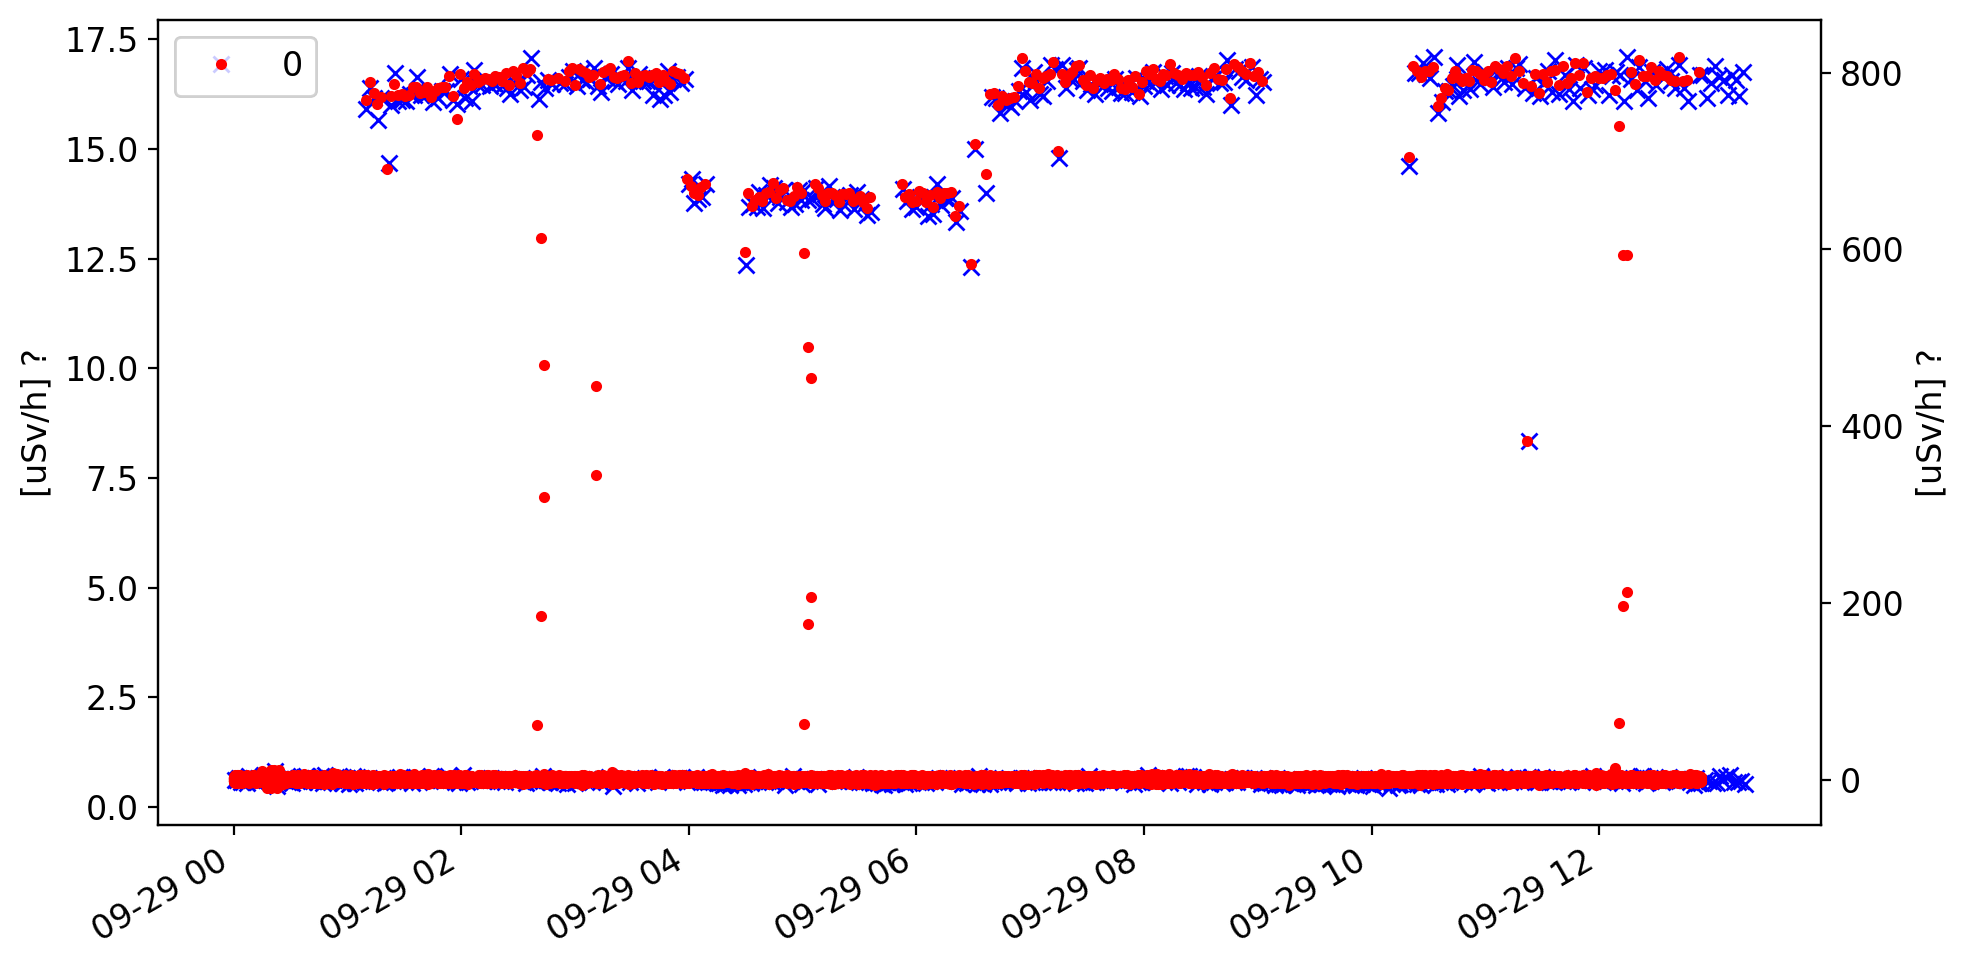

In [46]:
signal = 'PAXA604:MIN'
#signal = 'PAXA605:MIN'
times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData[signal][0]]) 
values = extractedData[signal][1]/1e-6
MIN_values = pd.DataFrame(values, index=times)

signal = 'PAXA604:RAW'
#signal = 'PAXA605:RAW'
times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData_RAW[signal][0]]) 
values = extractedData_RAW[signal][1]/1e-6
RAW_values = pd.DataFrame(values, index=times)

MIN_values.plot(style='bx')
plt.ylabel('[uSv/h] ?')

ax2 = plt.twinx()
RAW_values.plot(ax = ax2, style='r.')
plt.ylabel('[uSv/h] ?')

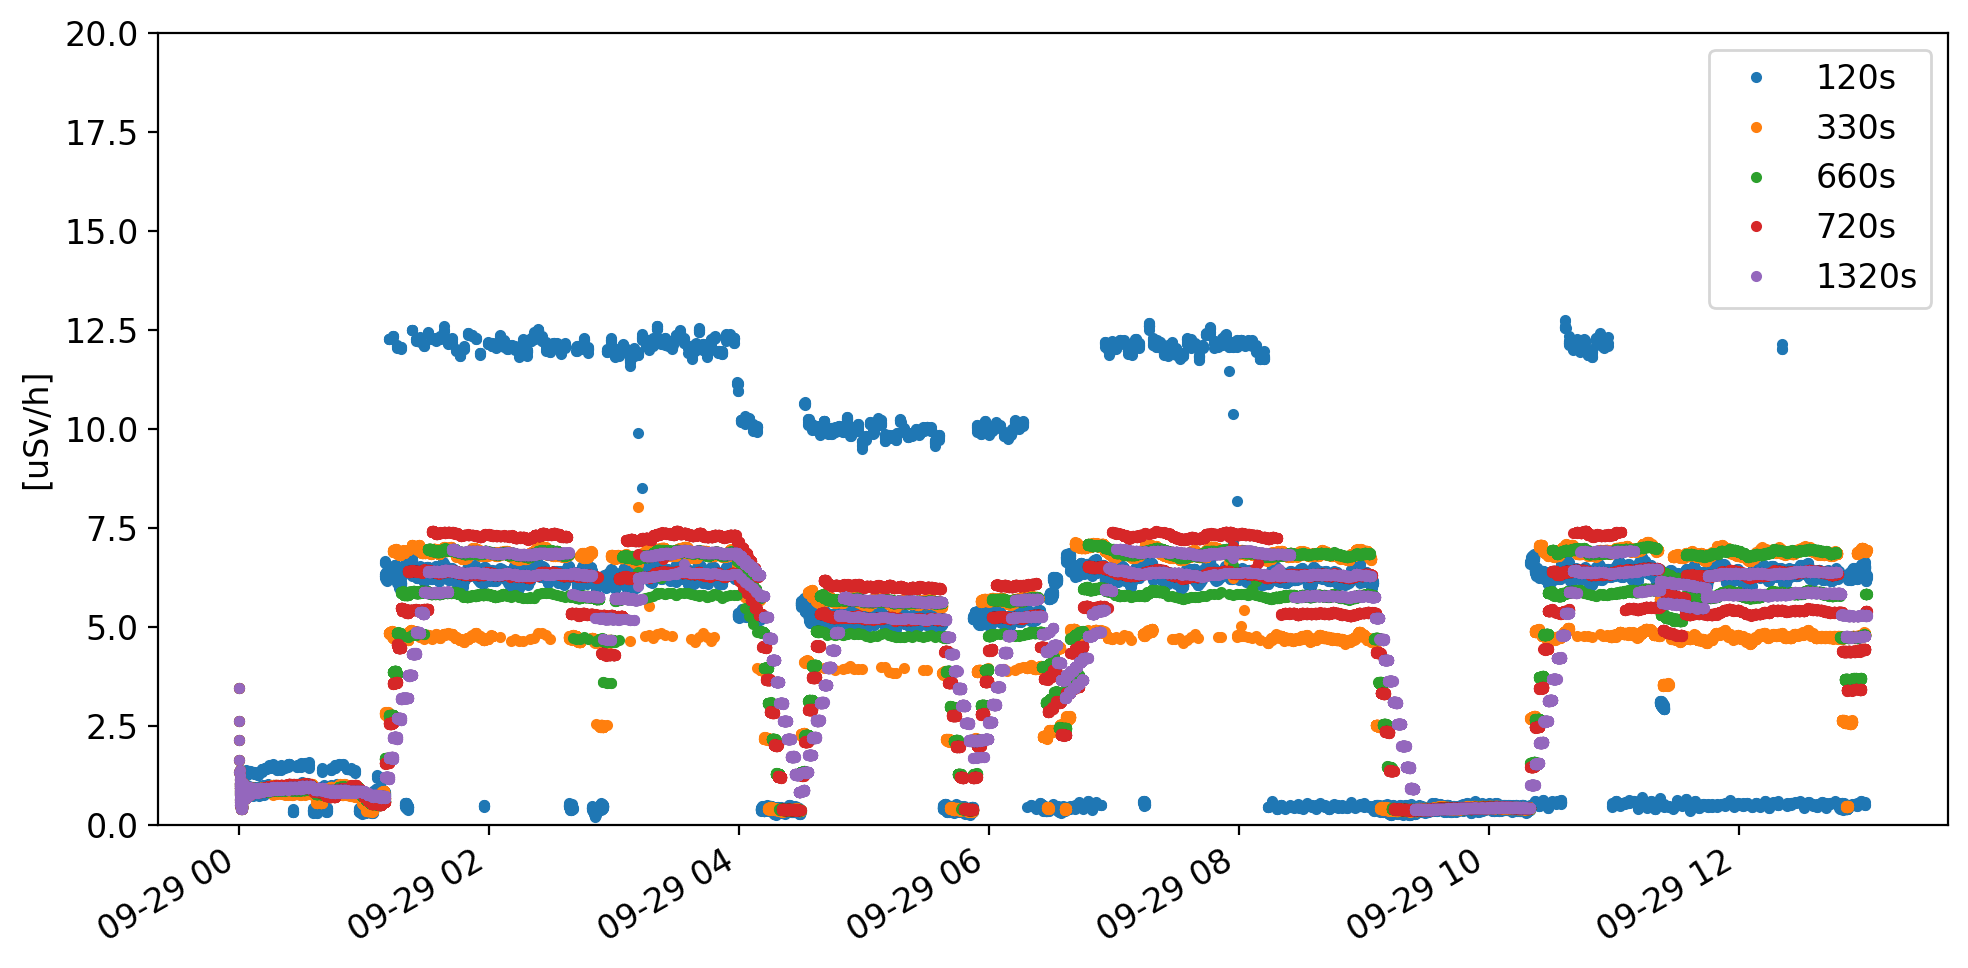

In [44]:
fig, ax = plt.subplots()
average_times = ['60s', '70s', '80s', '90s', '100s', '110s']
average_times = ['120s', '330s', '660s', '720s', '1320s',]

for average_time in average_times:
    RAW_values.rolling(average_time).mean().plot(ax=ax, style='.')
plt.ylim([0, 20])
plt.ylabel('[uSv/h]')
plt.legend(average_times)

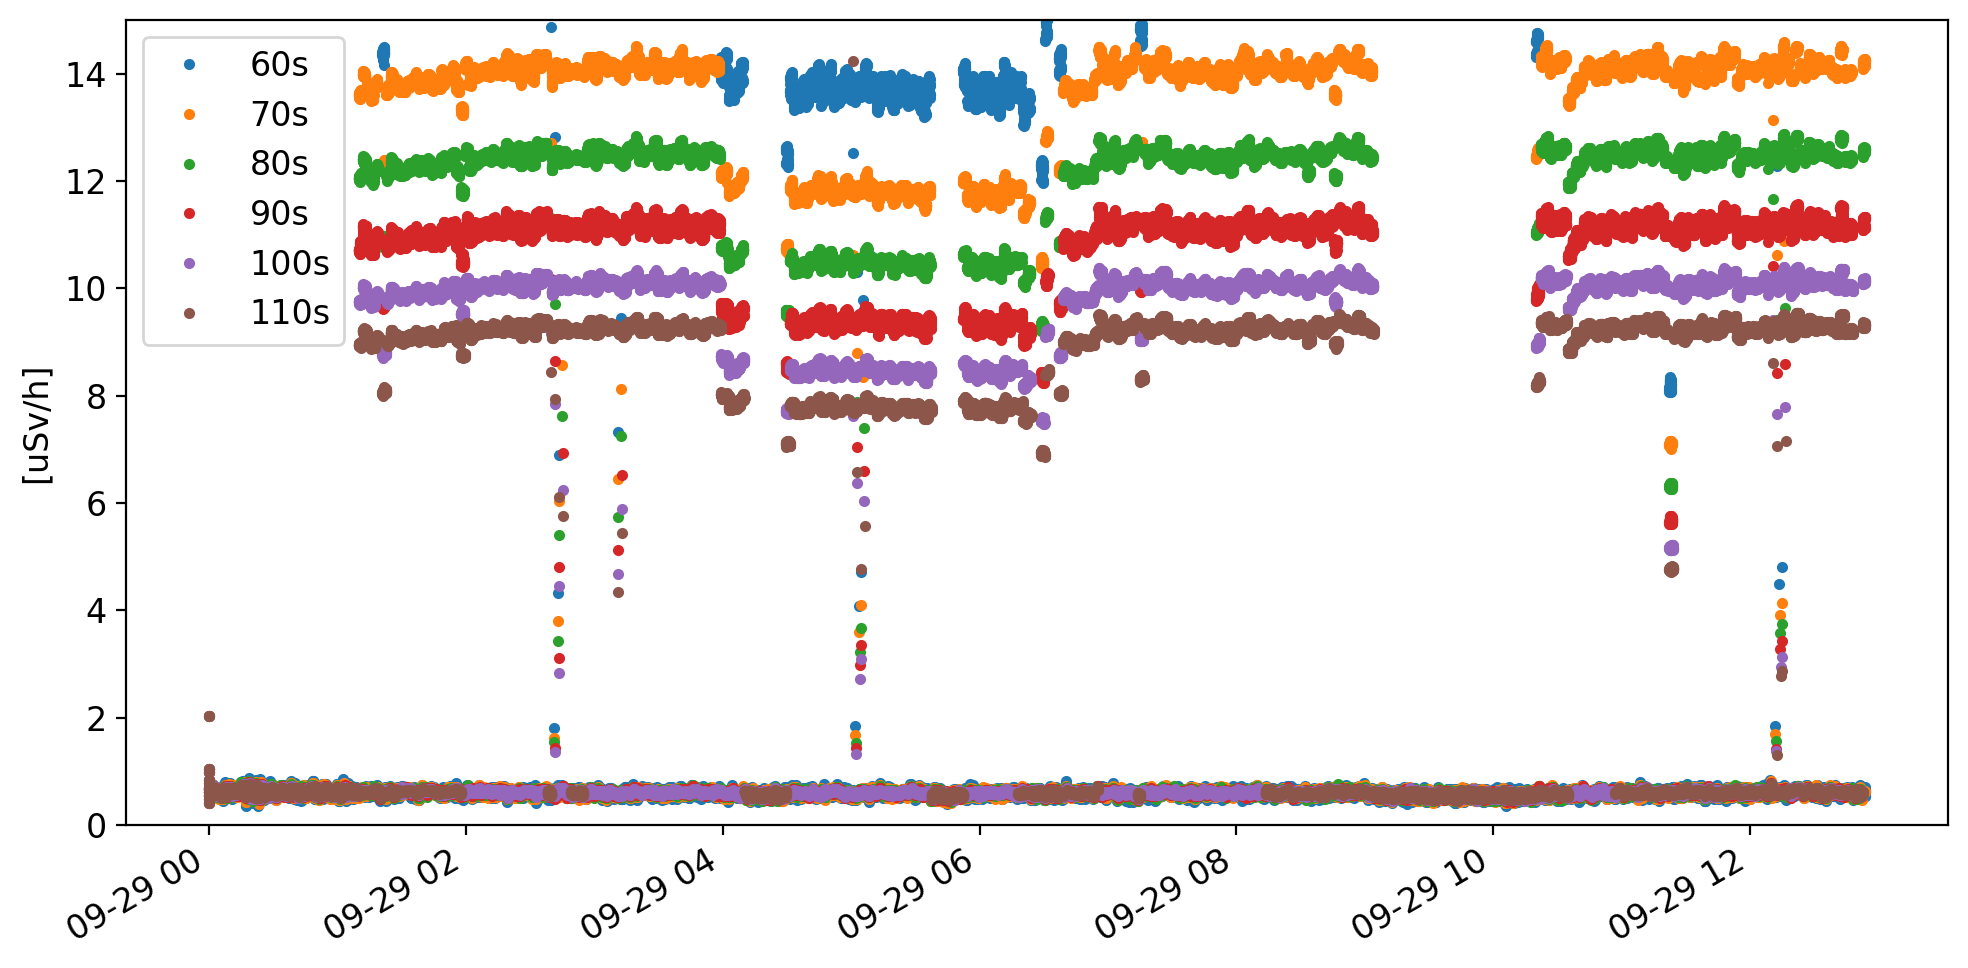

In [47]:
fig, ax = plt.subplots()
average_times = ['60s', '70s', '80s', '90s', '100s', '110s']

for average_time in average_times:
    RAW_values.rolling(average_time).mean().plot(ax=ax, style='.')
plt.ylim([0, 15])
plt.ylabel('[uSv/h]')
plt.legend(average_times)

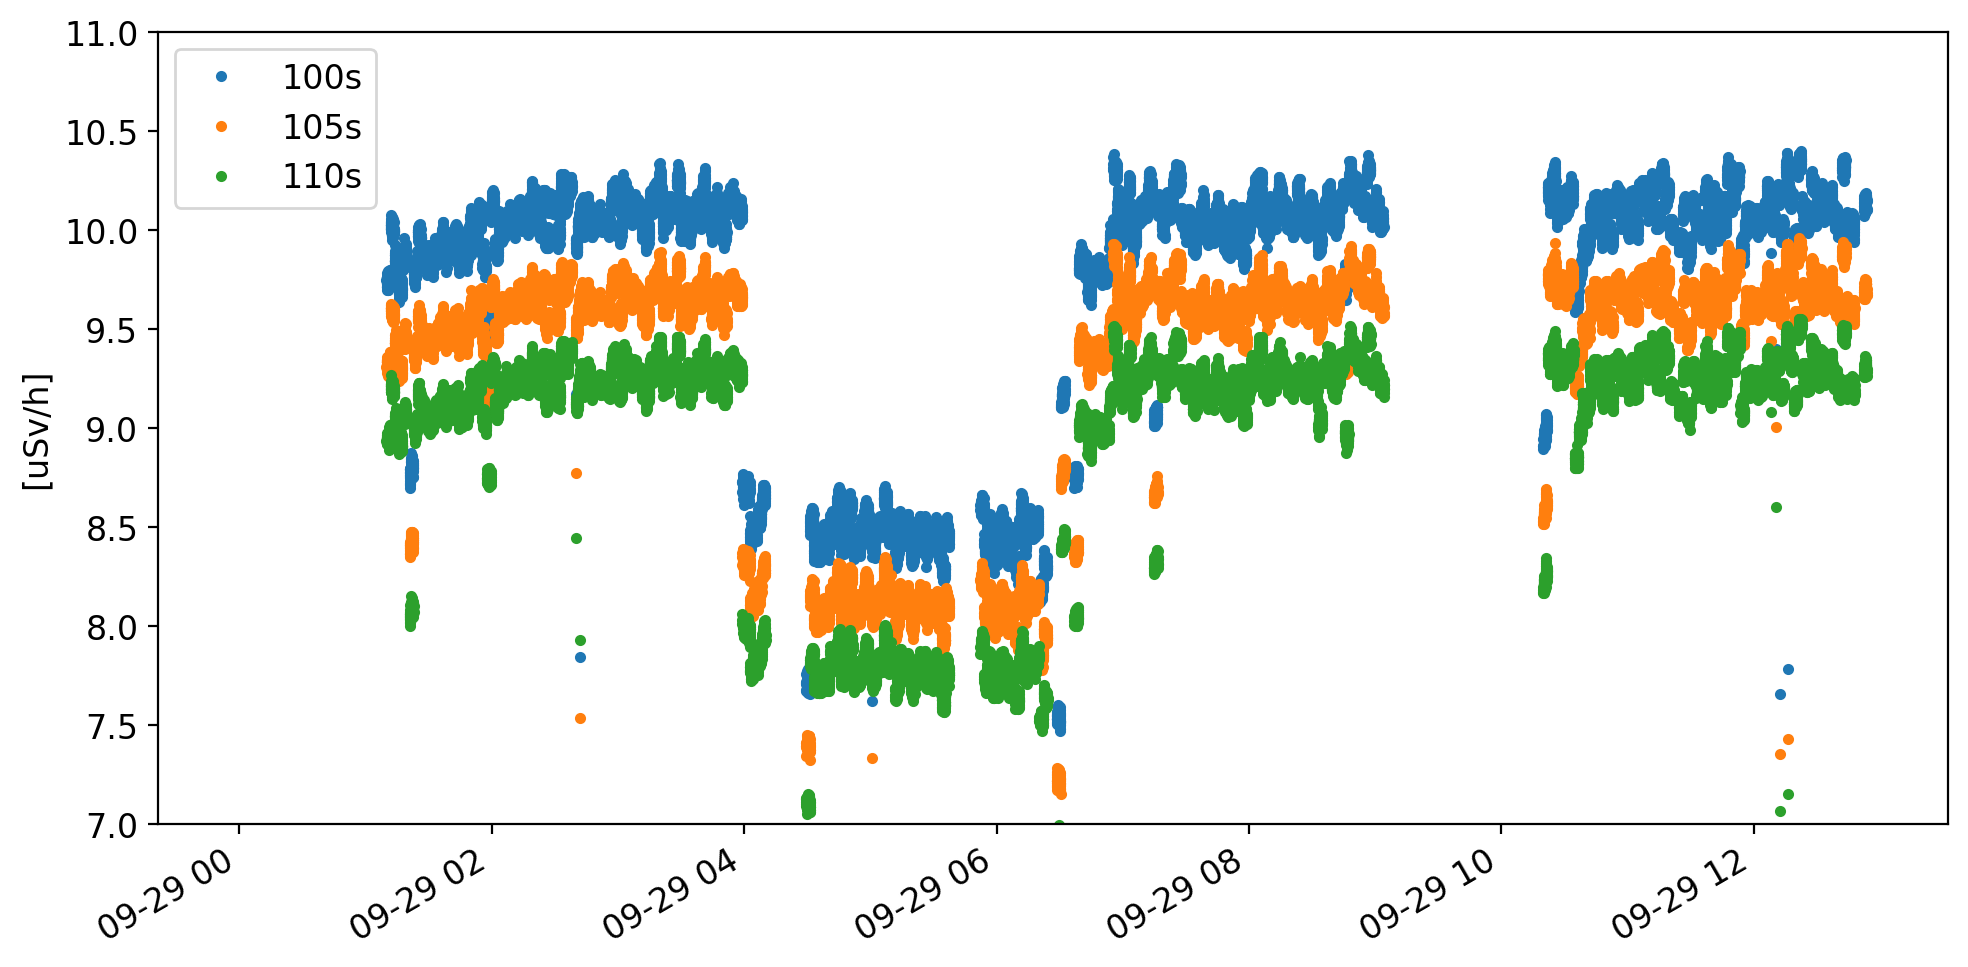

In [48]:
fig, ax = plt.subplots()
average_times = ['100s', '105s', '110s']

for average_time in average_times:
    RAW_values.rolling(average_time).mean().plot(ax=ax, style='.')
plt.ylim([7, 11])
plt.ylabel('[uSv/h]')
plt.legend(average_times)

In [41]:
1203/1467

0.820040899795501

(1633046400.0, 1636934160.0)


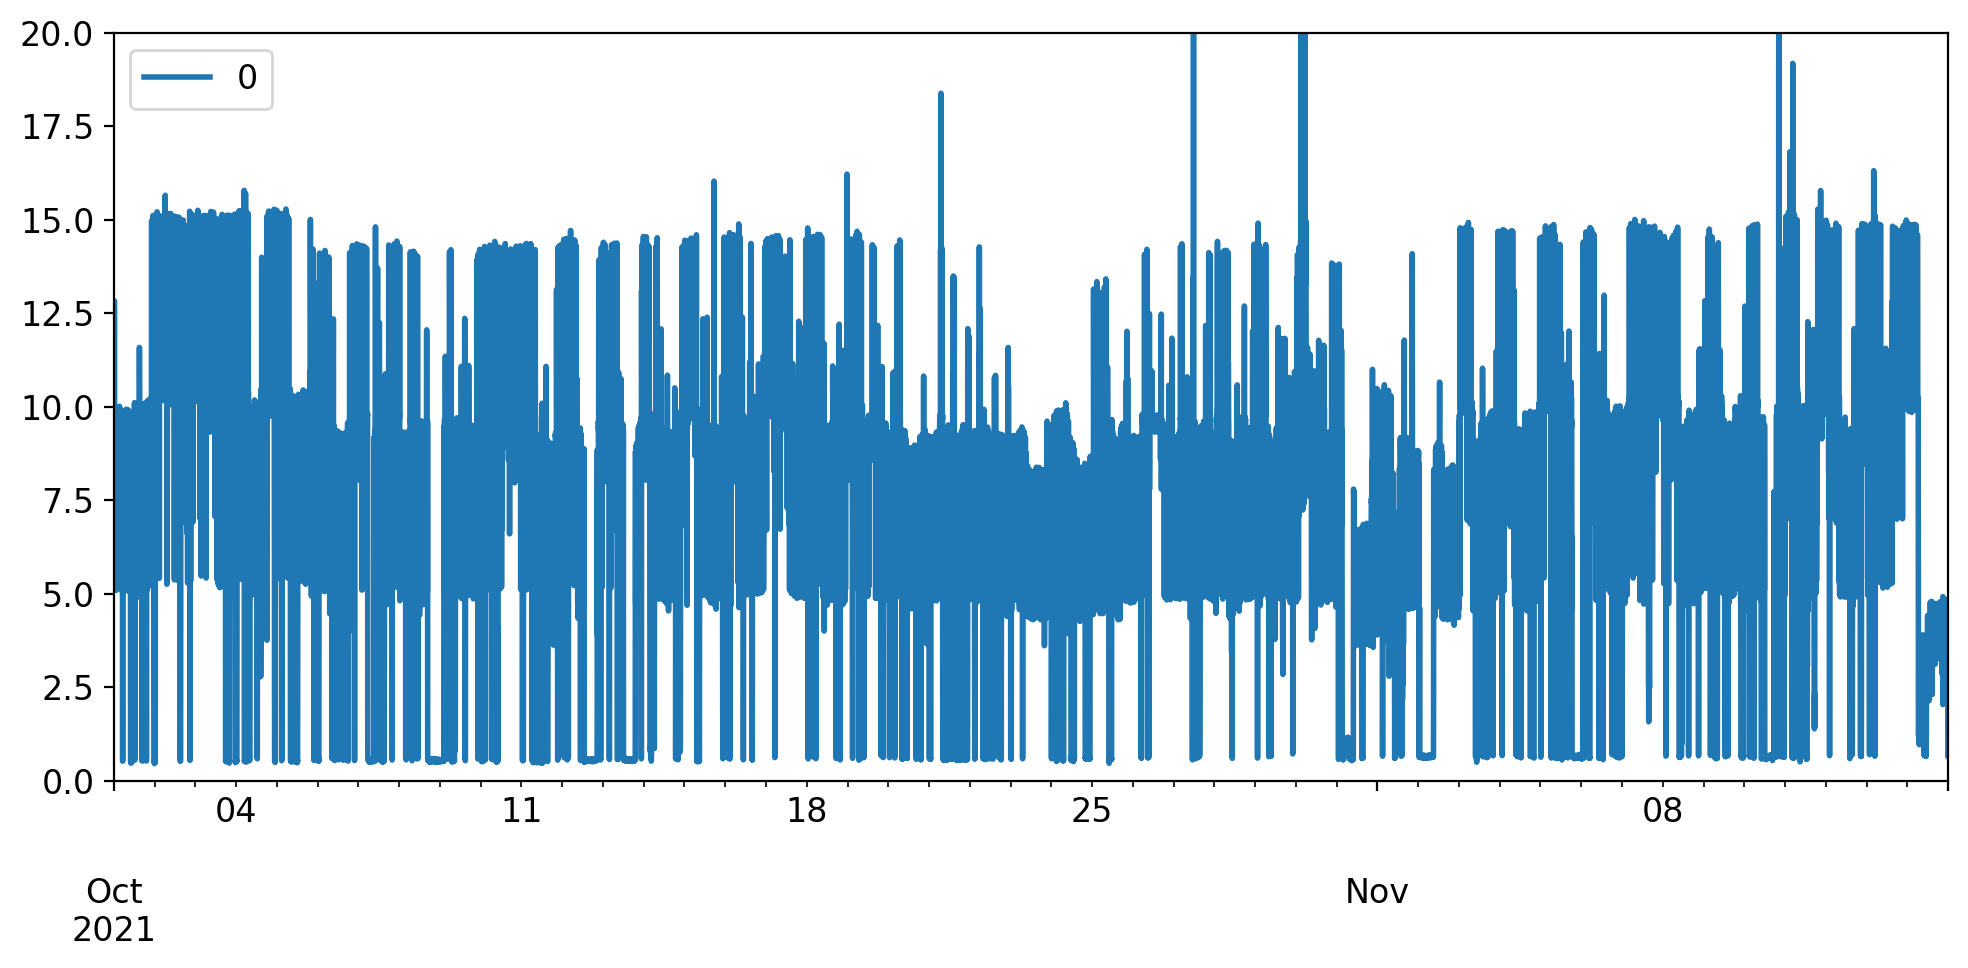

In [46]:
#df.sort_index().plot()
#((df.sort_index().rolling('240s').sum())/4).plot()
#((df.sort_index().rolling('240s').mean())).plot()
((df.sort_index().resample('240s').mean())).plot()

plt.ylim([0, 20])
#plt.xlim([18898.75071489236, 18904.249950825233])
print(plt.xlim())


In [ ]:
fig, ax = plt.subplots(figsize=(13,4))

ax.plot(extractedData_2018['PAXA604:MIN'][0]-extractedData_2018['PAXA604:MIN'][0][0])

In [ ]:
fig, ax = plt.subplots(figsize=(13,4))

for signal in ['PAXA604:MIN','PAXA605:MIN']: #vars_RP.keys():
    times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData_2018[signal][0]]) + pd.offsets.DateOffset(years=3)
    values = extractedData_2018[signal][1]/1e-6
    #df = pd.DataFrame(values, index=times)
    #df.rolling('2m').mean().plot()
    ax.plot(times, values, '.',  markersize=5, label=signal+' ('+vars_RP[signal]+')-2018')
    times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData_2021[signal][0]])
    values = extractedData_2021[signal][1]/1e-6
    ax.plot(times, values, 'x', markersize=5, label=signal+' ('+vars_RP[signal]+')-2021')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%m"))
plt.xticks(rotation=30)
plt.grid(False)
plt.legend(loc='upper left')
plt.ylabel('mean dose rate [uS/h]')
plt.xlabel('')
plt.ylim([0, 40])

In [18]:
times 

array([Timestamp('2021-10-01 00:00:47.998000'),
       Timestamp('2021-10-01 00:01:47.999000'),
       Timestamp('2021-10-01 00:02:47.999000'), ...,
       Timestamp('2021-11-14 23:56:47.986000'),
       Timestamp('2021-11-14 23:58:47.982000'),
       Timestamp('2021-11-14 23:59:47.984000')], dtype=object)

In [12]:
extractedData_2018['PAXA604:MIN'][0]

array([1.53834486e+09, 1.53834492e+09, 1.53834498e+09, ...,
       1.54223628e+09, 1.54223634e+09, 1.54223640e+09])

In [10]:
extractedData_2018_2 = extractedData_2018.rename(columns=vars_RP)
extractedData_2021_2 = extractedData_2021.rename(columns=vars_RP)
# add fake timing in 2018 data
extractedData_2018_2['time_21'] = extractedData_2018_2.index + pd.offsets.DateOffset(years=3)

AttributeError: 'dict' object has no attribute 'rename'

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
extractedData_2018_2.plot(ax=ax, label='2018', y='AEgIS', x='time_21')
extractedData_2021_2.plot(ax=ax, label='2021', y='AEgIS')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%m"))
plt.xticks(rotation=30)
plt.grid(False)
plt.legend(loc='lower right')
plt.ylabel('AEgIS')
plt.xlabel('')

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

auxFilter2018 = (pd_merge_2018['FTA_9053'] > 1450/2) & (pd_merge_2018['FTA_9053'] < 1600) & \
    (extractedData_2018_2['time_21'] > utils.to_datetime_utc("2021-10-13T00:00:00")) & \
    (extractedData_2018_2['time_21'] < utils.to_datetime_utc("2021-11-12T00:00:00"))
pd_merge_2018[auxFilter2018].plot(ax=ax, label='2018', y='FTA_9053', x='time_21')

auxFilter2021 = (pd_merge_PS['FTA_9053'] > 1450/2) & (pd_merge_PS['FTA_9053'] < 1600) & \
    (pd_merge_PS.index > utils.to_datetime_utc("2021-10-13T00:00:00")) & \
    (pd_merge_PS.index < utils.to_datetime_utc("2021-11-12T00:00:00"))
pd_merge_PS['FTA_9053'][auxFilter2021].plot(ax=ax, label='2021')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%m"))
plt.xticks(rotation=30)
plt.grid(False)

plt.legend(loc='lower right')
plt.ylabel('p on target 10^10')
plt.xlabel('')

In [5]:
# if one wants to filter by destination, one can use the following variables:
signals_destination = ['ELENA.TGM:PARTY','ELENA.TGM:WITHOUT_BEAM','ELENA.TGM:DYN_DEST_AEGIS', 'ELENA.TGM:DYN_DEST_ALPHA','ELENA.TGM:DYN_DEST_ASACUSA1','ELENA.TGM:DYN_DEST_ASACUSA2', 'ELENA.TGM:DYN_DEST_BASE', 'ELENA.TGM:DYN_DEST_GBAR']
beamDestinationData = ldb.get(signals_destination, t1, t2)

### Note: data could be stored on your local disk in the form of a database:

This would allow one to get data, save it in a local "database", and re-extract it later stage from a local db (i.e. without the need of NXCALS and its latency...)

**Save the data:**
```
from pytimber import pagestore
mydb = pagestore.PageStore('mydata.db', './datadb')
mydb.store(extractedData)
mydb.store(beamDestinationData)
```

**Load the data:**
```
extractedData = mydb.get(signals_proton+signals_intensity_AD+signals_intensity_ELENA, t1, t2)
beamDestinationData = mydb.get(signals_destination, t1, t2)
```

### Treat all data

In [6]:
# Protons - easy, single value
proton_times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData[signals_proton[0]][0]])
proton_values = extractedData[signals_proton[0]][1]

In [7]:
# AD: more or less simple, sampler with data inside
pbar_ad_times = np.array([datetime.datetime.fromtimestamp(_time) for _time in extractedData[signals_intensity_AD[0]][0]])

#   This works only for 'DR.BCCCA_CHARGE-SD:Samples:hotSpotsSamples'
#_BCCCADATA_XS_values = np.array(extractedData[signals_intensity_AD[0]][1])[:, 0, :]
#   This should work also for 'ADE.BCCCA:Acquisition:numOfChargesPerFlatTop'
_BCCCADATA_XS_values = np.array(extractedData[signals_intensity_AD[0]][1]).reshape(-1, 8) 

pbar_ad_injected  = _BCCCADATA_XS_values[:, 0]
pbar_ad_extracted = _BCCCADATA_XS_values[:, 7]
ad_transmission   = 100*np.divide(pbar_ad_extracted, pbar_ad_injected)

In [8]:
# ELENA: more or less simple, but need to filter pbar cycles
# Profiting of 'ELENA.TGM:PARTY' which is logged for each cycle and tells which particle this cycle has...

# 1. create a dict to distinguish which particle type we are looking at
_party_stamp = beamDestinationData[signals_destination[0]][0]
_party_value = beamDestinationData[signals_destination[0]][1]
particle_per_cycle = dict(zip(_party_stamp, _party_value))

# 2. injected intensity
elena_injected_stamps = extractedData[signals_intensity_ELENA[0]][0]
elena_injected_values = extractedData[signals_intensity_ELENA[0]][1]
elena_injected_times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in elena_injected_stamps])
elena_injected_party  = [particle_per_cycle[_stamp] if _stamp in particle_per_cycle else None for _stamp in elena_injected_stamps]
elena_injected_pbars  = [_aux == 'PBAR' for _aux in elena_injected_party]

# 3. similar, ejected intensities
elena_LNE00_stamps = extractedData[signals_intensity_ELENA[1]][0]
elena_LNE00_values = extractedData[signals_intensity_ELENA[1]][1]
elena_LNE00_times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in elena_LNE00_stamps])
elena_LNE00_party  = [particle_per_cycle[_stamp] if _stamp in particle_per_cycle else None for _stamp in elena_LNE00_stamps]
elena_LNE00_pbars  = [_aux == 'PBAR' for _aux in elena_LNE00_party]

elena_LNE50_stamps = extractedData[signals_intensity_ELENA[2]][0]
elena_LNE50_values = extractedData[signals_intensity_ELENA[2]][1]
elena_LNE50_times  = np.array([datetime.datetime.fromtimestamp(_time) for _time in elena_LNE50_stamps])
elena_LNE50_party  = [particle_per_cycle[_stamp] if _stamp in particle_per_cycle else None for _stamp in elena_LNE50_stamps]
elena_LNE50_pbars  = [_aux == 'PBAR' for _aux in elena_LNE50_party]

### Make some plot

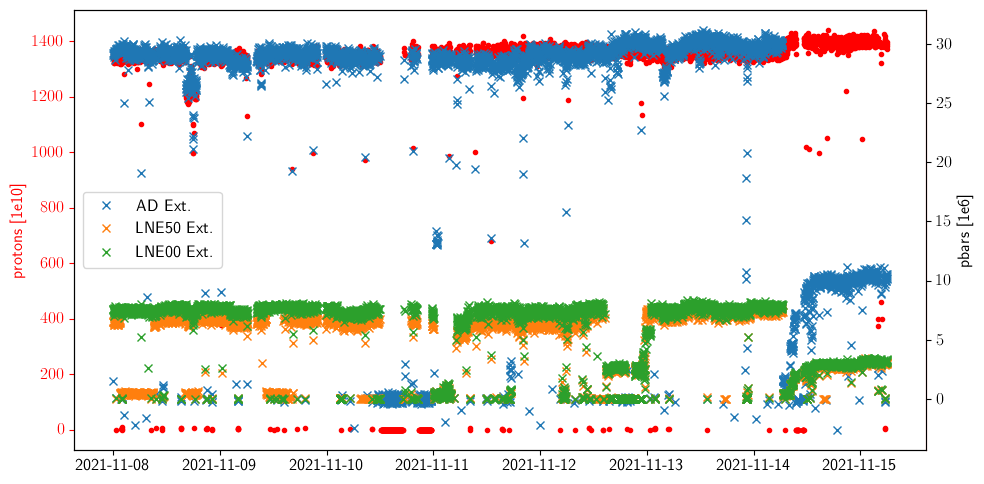

In [9]:
# Simple plot with all main intensities for the whole week
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(proton_times, proton_values, 'r.', label='Protons')
ax1.set_ylabel('protons [1e10]', color='r')
ax1.spines['right'].set_color('r')
ax1.tick_params(axis='y', colors='r')

ax2.plot(pbar_ad_times, pbar_ad_extracted/1e6, 'x', label='AD Ext.')
ax2.plot(elena_LNE50_times[elena_LNE50_pbars], elena_LNE50_values[elena_LNE50_pbars], 'x', label='LNE50 Ext.')
ax2.plot(elena_LNE00_times[elena_LNE00_pbars], elena_LNE00_values[elena_LNE00_pbars], 'x', label='LNE00 Ext.')
ax2.set_ylabel("pbars [1e6]")
ax2.legend()

# A different way of treating data using pandas

In [10]:
# Use pandas store and treat all data
import pandas as pd

# calibration factor correction for hminus at injection
hminus_inj_calib = 4.3/32.25

# define a list of names with known users (TODO: redundant! find better way...)
users = ['AEGIS','ALPHA', 'ASACUSA1', 'ASACUSA2', 'BASE', 'GBAR']

for destination in signals_destination:
    _stamp = beamDestinationData[destination][0]
    _value = beamDestinationData[destination][1]
    
    if destination == 'ELENA.TGM:PARTY':
        beamDestinationDF = pd.DataFrame(_value, index =_stamp, columns =['PARTY'])
    else:
        _name = destination.split(sep='_')[-1]
        # convert type to bool, easier to use later
        _value = _value.astype(bool)
        df = pd.DataFrame(_value, index =_stamp, columns =[_name])
        beamDestinationDF = pd.concat([beamDestinationDF, df], axis=1)
        
# need to invert logic of beam (that is without_beam!)
beamDestinationDF['BEAM'] = ~beamDestinationDF['BEAM']

# create a column for 'UNKNOWN' destination
beamDestinationDF['UNKNOWN'] = ~(beamDestinationDF[users].any(axis=1))

# add data from beam
df = pd.DataFrame(elena_injected_values, index = elena_injected_stamps, columns =['ELENA Inj.'])
beamDestinationDF = pd.concat([beamDestinationDF, df], axis=1)
df = pd.DataFrame(elena_LNE00_values,    index = elena_LNE00_stamps,    columns =['LNE00 Eje.'])
beamDestinationDF = pd.concat([beamDestinationDF, df], axis=1)
df = pd.DataFrame(elena_LNE50_values,    index = elena_LNE50_stamps,    columns =['LNE50 Eje.'])
beamDestinationDF = pd.concat([beamDestinationDF, df], axis=1)

# convert timestamps to local datetime
beamDestinationDF.index = pd.to_datetime((beamDestinationDF.index*1e9).astype(int), utc=True).tz_convert('CET')

# remove corrupted data (cause we got intensities, but not beam type and so on...)
_aux = len(beamDestinationDF[beamDestinationDF['BEAM'].isna()])
if _aux > 0:
    print('Detected {} corrupted data'.format(_aux))
    beamDestinationDF = beamDestinationDF[~beamDestinationDF['BEAM'].isna()]

# fix calibration factor of H- beams injected intensity
beamDestinationDF.loc[beamDestinationDF['PARTY']=='HMINUS', 'ELENA Inj.'] *= hminus_inj_calib

# let's have a quick look at how it looks like for "useful", i.e. with BEAM, cycles:
beamDestinationDF[beamDestinationDF['BEAM']].head()

Detected 1 corrupted data


PARTY  BEAM AEGIS ALPHA ASACUSA1 ASACUSA2  \
2021-11-08 00:01:25.732999936+01:00  PBAR  True  True  True    False    False   
2021-11-08 00:03:20.933000192+01:00  PBAR  True  True  True    False    False   
2021-11-08 00:05:16.133000192+01:00  PBAR  True  True  True    False    False   
2021-11-08 00:07:11.332999936+01:00  PBAR  True  True  True    False    False   
2021-11-08 00:09:06.532999936+01:00  PBAR  True  True  True    False    False   

                                     BASE  GBAR UNKNOWN  ELENA Inj.  \
2021-11-08 00:01:25.732999936+01:00  True  True   False   33.572201   
2021-11-08 00:03:20.933000192+01:00  True  True   False   33.149700   
2021-11-08 00:05:16.133000192+01:00  True  True   False   32.924000   
2021-11-08 00:07:11.332999936+01:00  True  True   False   32.437000   
2021-11-08 00:09:06.532999936+01:00  True  True   False   31.595301   

                                     LNE00 Eje.  LNE50 Eje.  
2021-11-08 00:01:25.732999936+01:00      7.5857      6.5733  
2021-11-08 00:03:20.933000192+01:00      7.6439      6.5075  
2021-11-08 00:05:16.133000192+01:00      7.5072      6.5079  
2021-11-08 00:07:11.332999936+01:00      7.2589      6.4703  
2021-11-08 00:09:06.532999936+01:00      7.0452      6.2371

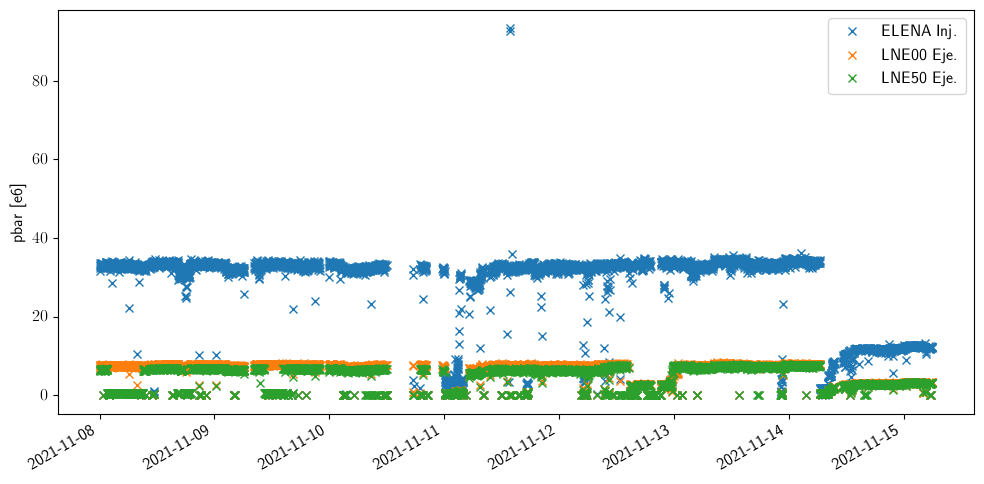

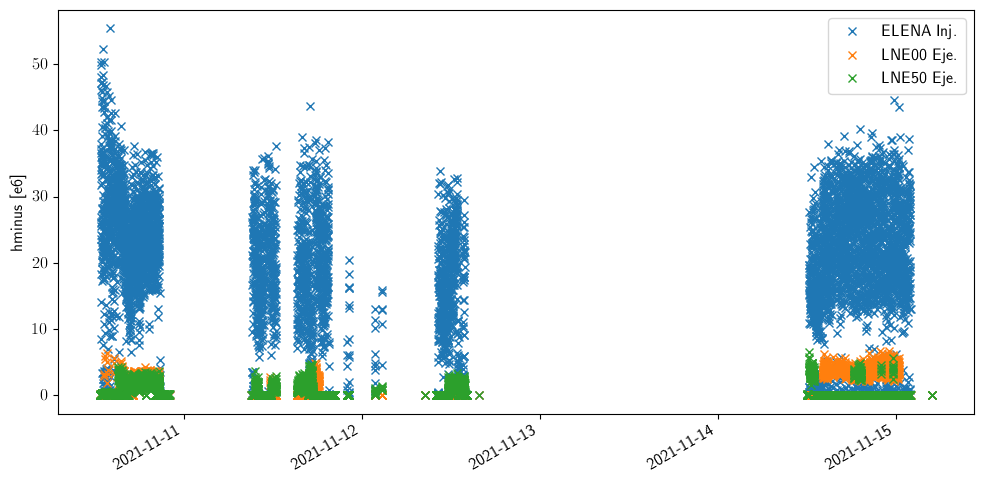

In [11]:
# Make a simple plot for pbars and hminus
for particle in ['PBAR', 'HMINUS']:
    beamDestinationDF[beamDestinationDF['BEAM'] & (beamDestinationDF['PARTY']==particle)][['ELENA Inj.','LNE00 Eje.','LNE50 Eje.']].plot(marker='x',linestyle='')
    plt.ylabel(particle.lower()+' [e6]')

##### More interesting: look at stats per destination

In [12]:
plt.rcParams['text.usetex'] = True # sometimes best to keep it False for faster plotting...

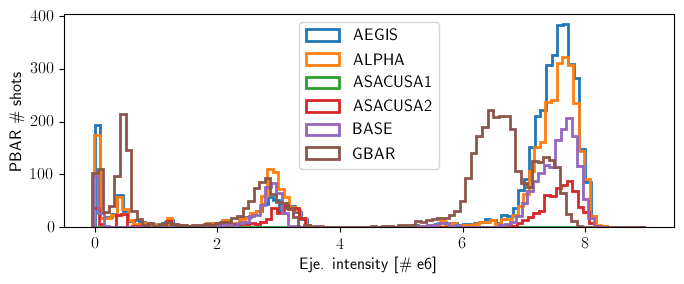

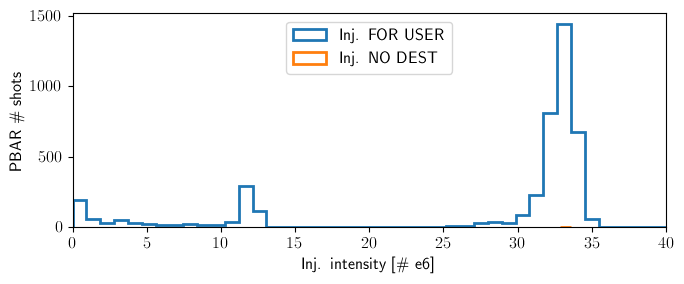

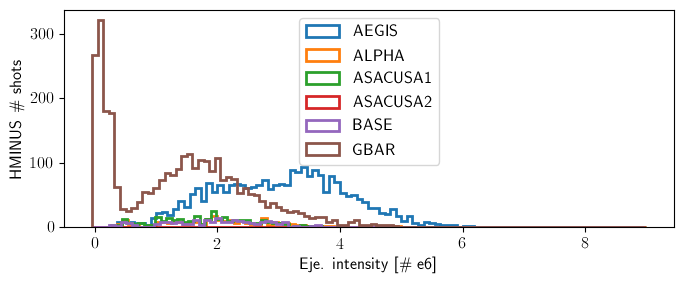

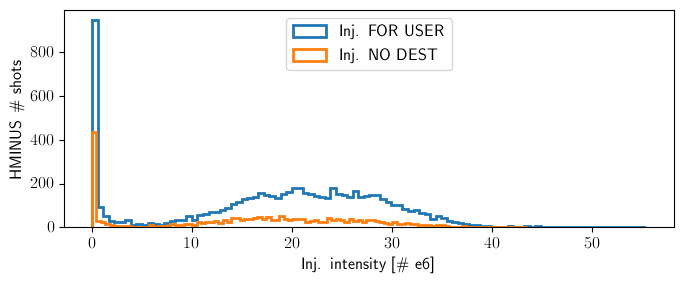

In [14]:
for particle in ['PBAR', 'HMINUS']:
    # extracted intensity per user
    nbins = 100
    bins = np.linspace(0,9,nbins)
    auxdelta = (bins[1]-bins[0])/10
    plt.figure(figsize=[7,3])
    ax1 = plt.gca()
    for i, user in enumerate(users):
        if user in ['GBAR','PUMA']:
            beamDestinationDF[beamDestinationDF['BEAM'] & (beamDestinationDF['PARTY']==particle) & beamDestinationDF[user]]['LNE50 Eje.'].hist(ax=ax1, bins=bins-i*auxdelta, grid=False, histtype=u'step', linewidth=2, label=user)
        else:
            beamDestinationDF[beamDestinationDF['BEAM'] & (beamDestinationDF['PARTY']==particle) & beamDestinationDF[user]]['LNE00 Eje.'].hist(ax=ax1, bins=bins-i*auxdelta, grid=False, histtype=u'step', linewidth=2, label=user)

    plt.legend(loc='upper center')
    plt.ylabel(particle+' \# shots')
    plt.xlabel('Eje. intensity [\# e6]')
    plt.savefig(particle+'extracted_per_user.pdf')

    # injected intensities
    plt.figure(figsize=[7,3])
    ax1 = plt.gca()
    beamDestinationDF[beamDestinationDF['BEAM'] & (beamDestinationDF['PARTY']==particle) & ~beamDestinationDF['UNKNOWN']]['ELENA Inj.'].hist(ax=ax1, bins=nbins, grid=False, histtype=u'step', linewidth=2, label='Inj. FOR USER')
    beamDestinationDF[beamDestinationDF['BEAM'] & (beamDestinationDF['PARTY']==particle) &  beamDestinationDF['UNKNOWN']]['ELENA Inj.'].hist(ax=ax1, bins=nbins, grid=False, histtype=u'step', linewidth=2, label='Inj. NO DEST')
    plt.legend(loc='upper center')
    plt.ylabel(particle+' \# shots')
    plt.xlabel('Inj. intensity [\# e6]')
    if particle == 'PBAR':
        plt.xlim([0, 40])

##### Similar, but plot density distibution [TODO]

(0.0, 40.0)

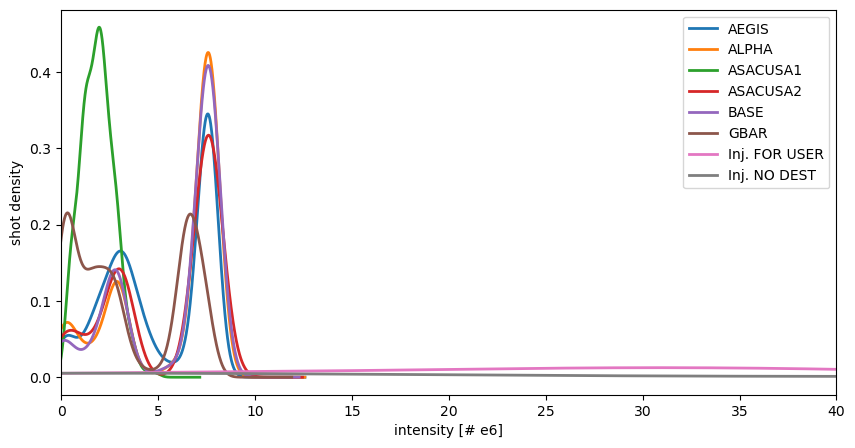

In [214]:

# extraction per user
plt.figure()
ax1 = plt.gca()
for user in users:
    if len(beamDestinationDF[beamDestinationDF['BEAM'] & beamDestinationDF[user]]) < 1:
        print('No shots for '.format(user))
        continue
    if user in ['GBAR','PUMA']:
        beamDestinationDF[beamDestinationDF['BEAM'] & beamDestinationDF[user]]['LNE50 Eje.'].plot(ax=ax1, kind = "kde", label=user)
    else:
        beamDestinationDF[beamDestinationDF['BEAM'] & beamDestinationDF[user]]['LNE00 Eje.'].plot(ax=ax1, kind = "kde", label=user)

# Add injected intensities
beamDestinationDF[beamDestinationDF['BEAM'] & ~beamDestinationDF['UNKNOWN']]['ELENA Inj.'].plot(ax=ax1, kind = "kde", label='Inj. FOR USER')
beamDestinationDF[beamDestinationDF['BEAM'] &  beamDestinationDF['UNKNOWN']]['ELENA Inj.'].plot(ax=ax1, kind = "kde", label='Inj. NO DEST')
plt.legend()
plt.ylabel('shot density')
plt.xlabel('intensity [# e6]')
plt.xlim([0, 40])